### 时间序列：
* 建立了观察结果与时间变化的关系，能帮预测未来一段时间内的结果变化情况
* 时间序列分析与回归分析的区别：
* 在选择模型前，我们需要确定结果与变量之间的关系。回归分析训练得到的是目标变量y与自变量x（一个或多个）的相关性，然后通过新的自变量x来预测目标变量y。而时间序列分析得到的是目标变量y与时间的相关性
* 回归分析擅长的是多变量与目标结果之间的分析，即便是单一变量，也往往与时间无关。而时间序列分析建立在时间变化的基础上，它会分析目标变量的趋势、周期、时期和不稳定因素等。这些趋势和周期都是在时间维度的基础上，是我们要观察的重要特征
* 按照时间顺序组成的数字序列
* 历史悠久，在中国古代的农业社会中，人们就将一年中不同时间节点和天气的规律总结了下来，形成了二十四节气，也就是从时间序列中观察天气和太阳的规律（只是当时没有时间序列模型和相应工具）
* 时间序列在金融、经济、商业领域拥有广泛的应用
* 机器学习模型，包括AR、MA、ARMA、ARIMA
* 神经网络模型，用LSTM进行时间序列预测


### 时间序列及分解：
* 平稳序列，stationary series
基本上不存在趋势（Trend）的序列，各观察值基本上在某个固定的水平上波动
* 非平稳序列，non-stationary series
包含趋势、季节性或周期性的序列，可以只有一种成分，也可能是多种成分的组合
* 趋势（trend）：时间序列在长时期内呈现出来的某种持续上升或持续下降的变动，也称长期趋势
* 季节性（seasonality）：时间序列在一年内重复出现的周期波动。销售旺季，销售淡季，旅游旺季、旅游淡季
季节，可以是任何一种周期性变化，不一定是一年中的四季
含有季节成分的序列可能含有趋势，也可能不含有趋势
* 周期性（cyclicity）：通常是由经济环境的变化引起
不同于趋势变动，不是朝着单一方向的持续运动，而是涨落相间的交替波动
不同于季节变动，季节变动有比较固定的规律，变动周期大多为一年。周期性的循环波动无固定规律，变动周期多在一年以上，且周期长短不一
* 随机性（Irregular），指受偶然因素影响所形成的的不规则波动，在时间序列中无法预估
随机性是不规则波动，除去趋势、周期性、季节性的偶然性波动

In [2]:
# 将原始数据格式中的year, month, day, hour进行合并，并保存新的文件pollution.csv
from pandas import read_csv
from datetime import datetime
# 数据加载
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('./PRSA_data_2010.1.1-2014.12.31.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
print(dataset.head())

                     No  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
year_month_day_hour                                                   
2010-01-01 00:00:00   1    NaN   -21 -11.0  1021.0   NW   1.79   0   0
2010-01-01 01:00:00   2    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2010-01-01 02:00:00   3    NaN   -21 -11.0  1019.0   NW   6.71   0   0
2010-01-01 03:00:00   4    NaN   -21 -14.0  1019.0   NW   9.84   0   0
2010-01-01 04:00:00   5    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [3]:
dataset.drop('No', axis=1, inplace=True)
# 列名替换
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# 缺失值填充
dataset['pollution'].fillna(0, inplace=True)
# 去掉第一天数据（前24小时）
dataset = dataset[24:]
# 数据浏览
print(dataset.head(5))
# 数据保存
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [6]:
# 数据加载
dataset = read_csv('./pollution.csv',index_col=0)
dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [7]:
values = dataset.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


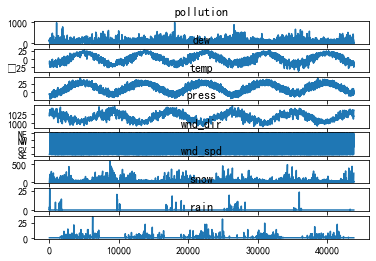

In [8]:
import matplotlib.pyplot as plt

# 一共有8个特征
i = 1
for group in range(8):
    # 8行1列，第i个
    plt.subplot(8,1,i)
    # 原始特征vlues中的group列进行可视化
    plt.plot(values[:,group])
    plt.title(dataset.columns[group])
    i += 1
plt.show()

In [15]:
dataset['wnd_dir'].value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: wnd_dir, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

# 讲分类特征wnd_dir进行标签编码
encoder = LabelEncoder()
values
dataset.columns
values[:, 4] = encoder.fit_transform(values[:,4])
# 设置数据类型为float32
values = values.astype('float32')

In [25]:
values[:, 4]

array([2., 2., 2., ..., 1., 1., 1.], dtype=float32)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled.shape

(43800, 8)

In [28]:
# 将时间序列数据转换为适用于监督学习的数据
'''
data:观察序列
n_in:观察数据input(x)的步长，范围[1,len(data)]，默认为1 
n_out:output(y)的步长，默认为1
dropnan:是否删除NaN行
返回值:只用于监督学习的DataFrame
'''

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # 去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [30]:
import pandas as pd
# 将时间序列数据转换为适合监督学习的数据
reframed = series_to_supervised(scaled, 1, 1)
reframed.to_csv('reframed-1.csv')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048,0.264706,0.245902,0.781818,0.333333,0.420866,0.000000,0.0


In [31]:
# 去掉不需要预测的列，即var2(t)var3(t)	var4(t)	var5(t)	var6(t)	var7(t)	var8(t)
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.to_csv('reframed-2.csv')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658
...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048


In [32]:
# 数据集切分，80%作为训练集，20%作为测试集
values = reframed.values
# LSTM 不能采用train_test_split(),因为时间序列不连续
# XGBoost可以采用train_test_split()，因为样本是相互独立的，跟时间序列无关
n_train_hours = int(len(values) * 0.8)
# :n_train_hours代表前n_train_hours行，后面:代表所有列
train = values[:n_train_hours,:]
test = values[n_train_hours:,:]

train_X,train_y = train[:,:-1],train[:,-1]
test_X,test_y = test[:,:-1],test[:,-1]
train_X.shape

(35039, 8)

In [42]:
values

array([[0.12977867, 0.35294122, 0.24590163, ..., 0.        , 0.        ,
        0.14889336],
       [0.14889336, 0.36764708, 0.24590163, ..., 0.        , 0.        ,
        0.15995975],
       [0.15995975, 0.4264706 , 0.22950819, ..., 0.        , 0.        ,
        0.18209255],
       ...,
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.        , 0.        ,
        0.01006036],
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.        , 0.        ,
        0.00804829],
       [0.00804829, 0.2647059 , 0.24590163, ..., 0.        , 0.        ,
        0.01207243]], dtype=float32)

In [33]:
train_y.shape

(35039,)

In [34]:
# 转化为3D格式[样本数，时间步，特征数]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

# 设置网络模型
model = Sequential()
model.add(LSTM(50,input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
# 模型训练
result = model.fit(train_X,train_y,epochs=12,batch_size=64,\
          validation_data=(test_X,test_y),verbose=2,shuffle=False)


Train on 35039 samples, validate on 8760 samples
Epoch 1/12
35039/35039 - 2s - loss: 0.0037 - val_loss: 0.0096
Epoch 2/12
35039/35039 - 1s - loss: 9.4952e-04 - val_loss: 0.0039
Epoch 3/12
35039/35039 - 1s - loss: 8.1668e-04 - val_loss: 0.0021
Epoch 4/12
35039/35039 - 1s - loss: 7.9822e-04 - val_loss: 0.0016
Epoch 5/12
35039/35039 - 1s - loss: 7.9616e-04 - val_loss: 0.0014
Epoch 6/12
35039/35039 - 1s - loss: 7.9643e-04 - val_loss: 0.0013
Epoch 7/12
35039/35039 - 1s - loss: 7.9761e-04 - val_loss: 0.0011
Epoch 8/12
35039/35039 - 1s - loss: 7.9850e-04 - val_loss: 0.0011
Epoch 9/12
35039/35039 - 1s - loss: 7.9873e-04 - val_loss: 0.0011
Epoch 10/12
35039/35039 - 1s - loss: 7.9853e-04 - val_loss: 0.0011
Epoch 11/12
35039/35039 - 1s - loss: 7.9811e-04 - val_loss: 0.0011
Epoch 12/12
35039/35039 - 1s - loss: 7.9758e-04 - val_loss: 0.0011


In [36]:
# 模型预测
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
test_predict

array([[0.0287059 ],
       [0.02955001],
       [0.05515604],
       ...,
       [0.0137467 ],
       [0.01370833],
       [0.01196568]], dtype=float32)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'test'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


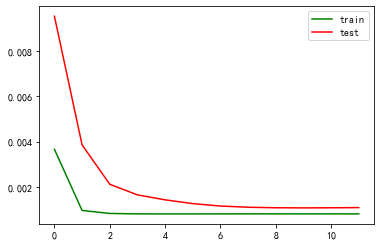

In [39]:
# 绘制训练损失和测试损失
line1 = result.history['loss']
line2 = result.history['val_loss']
plt.plot(line1,label='train',c='g')
plt.plot(line2,label='test',c='r')
plt.legend(loc='test') # 图例 train，test
plt.show()

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


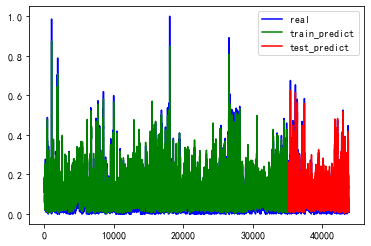

In [41]:
# 呈现原始数据，训练结果，预测结果
def plot_img(source_data_set,train_predict,test_predict):
    # 原始数据（蓝色）
    plt.plot(source_data_set[:,-1],label='real',c='b')
    # 训练数据（绿色）
    plt.plot([x for x in train_predict],label='train_predict',c='g')
    # 预测结果（红色）
    plt.plot([None for _ in train_predict] + [x for x in test_predict],label='test_predict',c='r')
    plt.legend(loc='best')
    plt.show()

# 绘制预测结果与实际结果的对比
plot_img(values,train_predict,test_predict)